## Advanced Lane Finding Project

The goals / steps of this project are the following:

* Rubric 1: Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
* Rubric 2-1: Apply a distortion correction to raw images.
* Use color transforms, gradients, etc., to create a thresholded binary image.
* Apply a perspective transform to rectify binary image ("birds-eye view").
* Detect lane pixels and fit to find the lane boundary.
* Determine the curvature of the lane and vehicle position with respect to center.
* Warp the detected lane boundaries back onto the original image.
* Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.

In [98]:
import numpy as np
import cv2
import glob

import matplotlib
from matplotlib import pyplot as plt
from matplotlib import image as mpimg
from IPython import display
from random import randint
import pickle

%matplotlib inline

In [99]:
# Utility function:
import os

# display 2 images and save with a different name in the given directory. Create directory  if not exist
def display_save_2_images(images, titles, image_file_full_name, file_prefix="", file_suffix="", output_directory='./output_images/'):
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.title(titles[0])
    plt.axis('off')
    plt.imshow(images[0], cmap='binary')
    plt.subplot(1, 2, 2)
    plt.title(titles[1])
    plt.axis('off')
    plt.imshow(images[1], cmap='binary')
    plt.tight_layout(pad=0.50)
    plt.tight_layout(pad=0.50)

    base=os.path.basename(image_file_full_name)
    (file_name,ext) = os.path.splitext(base)
    new_file_name = file_prefix + file_name + file_suffix + ext
    image_file_full_name_newdir = os.path.join(output_directory, new_file_name)

    print (image_file_full_name, new_file_name, image_file_full_name_newdir)
    if not os.path.exists(output_directory): #if output dir doesn't exists, create it
        os.makedirs(output_directory)

    plt.suptitle(new_file_name)
    plt.savefig(image_file_full_name_newdir)
    
    plt.show()
    return

In [100]:
# Read Image
def readImage(imageFileName):
    img_rgb_cv2 = cv2.imread(imageFileName) # mpimg.imread(img_fname)
    img_bgr_mtplt = cv2.cvtColor(img_rgb_cv2, cv2.COLOR_RGB2BGR)
    return(img_rgb_cv2, img_bgr_mtplt)

In [101]:
# Save an image, not used. We use matplot save fig! otherwise too many format converstions.
def saveImage(imageFileName, image):
    cv2.imwrite(imageFileName, image)

# Rubric 1: Camera Calibration

./camera_cal/calibration2.jpg Udestorted_calibration2.jpg ./output_images/Udestorted_calibration2.jpg


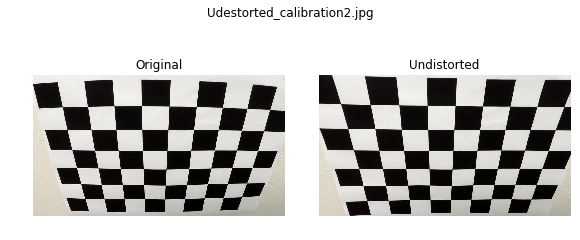

In [102]:
# Test calibration on a chessboard image. Store the result in the output folder
# load camera calibration param
# Note: This cell should be deleted when finding the proper parameters

dist_pickle = pickle.load( open( "./camera_calibration.p", "rb" ) ); mtx = dist_pickle["mtx"]; dist = dist_pickle["dist"]

image_name = './camera_cal/calibration2.jpg'
(image_bgr_cv2, image_rgb_mtplt) = readImage(image_name);    img = image_rgb_mtplt
img_undistorted = cv2.undistort(img, mtx, dist, None, mtx)
file_prefix = "Udestorted_"
file_extention = ""
outdir = './output_images/'
display_save_2_images([img, img_undistorted], ['Original', 'Undistorted'], image_name, file_prefix, file_extention, './output_images/')

# Rubric 2: Pipeline

Pipeline is called after defining every function in the pipeline: The pipeline code is:
-     img = readImage(image_name)

-     img_undistorted = undistortImage(img)
    saveUndestortedImage(img_undistorted)
    binaryImage = createBinaryImage(img_undistorted)
    wrapedImages = wrapeImage(binaryImage)

In [103]:
# load camera calibration param
dist_pickle = pickle.load( open( "./camera_calibration.p", "rb" ) ); mtx = dist_pickle["mtx"]; dist = dist_pickle["dist"]

In [104]:
# Parameters:
sobel_kernel_size = 9
sx_thresh = (20, 100)
sc_thresh = (170, 255)

# Rubric 2-1: Distortion correction

In [105]:
# Undistort an image
def undistortImage(img):
    return (cv2.undistort(img, mtx, dist, None, mtx))

# Rubric 2-2: Color transforms

In [106]:
def colorConvert (img):
# Convert to HSV color space
    img = np.copy(img)
    hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HLS).astype(np.float)
    return hsv

# Rubric 2-3: Sobel x gradients and color thresholdeds binary image

In [107]:
def sobelBinaryHSVImage(hsv, sobel_kernel=3, sc_thresh=(30,80), sx_thresh=(150,255)):
    # Use the S channel only, and Sobel x only
    channel = hsv[:,:,2] # s_channel
    sobel_x = cv2.Sobel(channel, cv2.CV_64F, 1, 0, ksize=sobel_kernel)

    sobel_x_abs = np.absolute(sobel_x) # Absolute derivative in x

    scaled_sobel_x = np.uint8(255*sobel_x_abs/np.max(sobel_x_abs)) # Scale to 8-bit (0 - 255) then convert to type = np.uint8

    # Threshold x gradient
    sx_binary = np.zeros_like(scaled_sobel_x)
    sx_binary[(scaled_sobel_x >= sx_thresh[0]) & (scaled_sobel_x <= sx_thresh[1])] = 1

    # Threshold color channel
    s_binary = np.zeros_like(channel)
    s_binary[(channel >= sc_thresh[0]) & (channel <= sc_thresh[1])] = 1

    # Create a binary flat image.
    binary = np.zeros_like(sx_binary)
    binary[(sx_binary == 1) | (s_binary == 1)] = 1

    return binary

# Rubric 2-4: Bird eye view: fixed polygone. 

# Rubric 2: Pipeline: Code - Save images for original and final image

In [108]:
# Prepare for the pipeline and read images
indir = './test_images/'
outdir = './output_images/perspective/';
file_suffix = "";
file_prefix = "";
image_names = glob.glob(indir+'*.jpg')

In [109]:
BLUE = [0,0,255]
YELLOW = [255,255,0]
PURPLE = [128,0,128]
GREEN = [0,255,0]
RED = [255, 0, 0]



def Perspectives(image_name, leftlowerpoint, leftupperpoint, rightupperpoint, rightlowerpoint):
# read the image
    (image_bgr_cv2, image_rgb_mtplt) = readImage(image_name);    img = image_rgb_mtplt
# pipeline
    img_undistorted = undistortImage(img);    #display_save_2_images([img, img_undistorted], ['Original', 'Undistorted'], image_name, "U_"+file_prefix, file_suffix, './output_images/undistorted/')
    hsv = colorConvert (img_undistorted);    #display_save_2_images([img_undistorted, hsv], ['Undistorted','hsv'], image_name, "H_"+file_prefix, file_suffix, './output_images/hsv/')
    binaryImage = sobelBinaryHSVImage(hsv, sobel_kernel_size, sc_thresh, sx_thresh);    #display_save_2_images([Original, binaryImage], ['Original', 'Sobel'], image_name, "B_"+file_prefix, file_suffix, outdir)
    linedImage = img_undistorted # binaryImage
    cv2.line(linedImage, leftlowerpoint, leftupperpoint, RED, 5)
    cv2.line(linedImage, rightlowerpoint, rightupperpoint, RED, 5)
    radius = 10
    center = (640, 400)



    print (img_undistorted.shape)
    cv2.circle(linedImage, center, radius, BLUE, thickness=10, lineType=8, shift=0)
    cv2.line(linedImage, (0,720), center, PURPLE, 5)
    cv2.line(linedImage, (1280,720), center, PURPLE, 5)
    
    sobelBinaryHSVImage(hsv, sobel_kernel_size, sc_thresh, sx_thresh);    #display_save_2_images([Original, binaryImage], ['Original', 'Sobel'], image_name, "B_"+file_prefix, file_suffix, outdir)
    display_save_2_images([binaryImage, linedImage], ['Original', 'lined'], image_name, "L_"+file_prefix, file_suffix, outdir)
    return
#    wrapedImages = wrapeImage(binaryImage)

(720, 1280, 3)
./test_images/straight_lines1.jpg L_straight_lines1.jpg ./output_images/perspective/L_straight_lines1.jpg


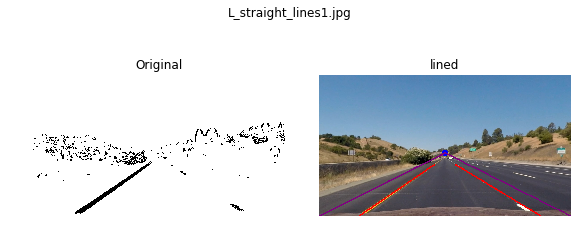

(720, 1280, 3)
./test_images/test4.jpg L_test4.jpg ./output_images/perspective/L_test4.jpg


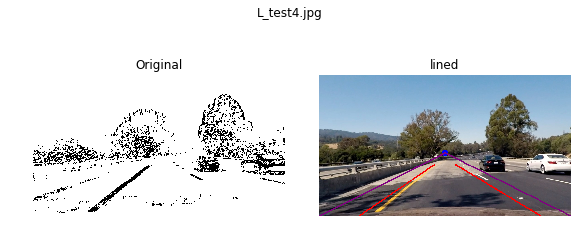

(720, 1280, 3)
./test_images/test6.jpg L_test6.jpg ./output_images/perspective/L_test6.jpg


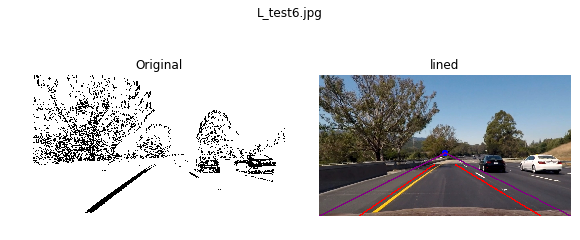

(720, 1280, 3)
./test_images/test2.jpg L_test2.jpg ./output_images/perspective/L_test2.jpg


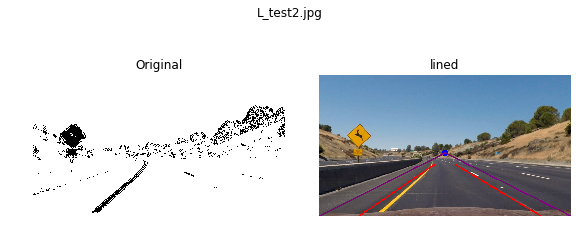

(720, 1280, 3)
./test_images/test1.jpg L_test1.jpg ./output_images/perspective/L_test1.jpg


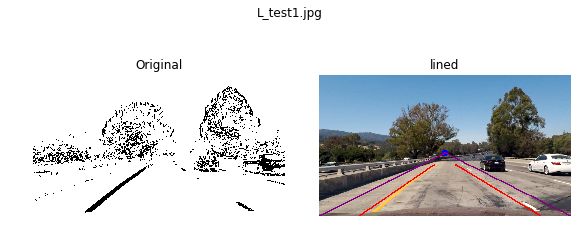

(720, 1280, 3)
./test_images/test5.jpg L_test5.jpg ./output_images/perspective/L_test5.jpg


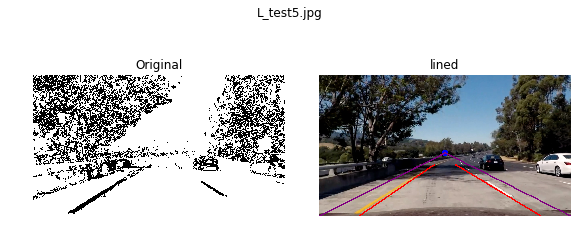

(720, 1280, 3)
./test_images/straight_lines2.jpg L_straight_lines2.jpg ./output_images/perspective/L_straight_lines2.jpg


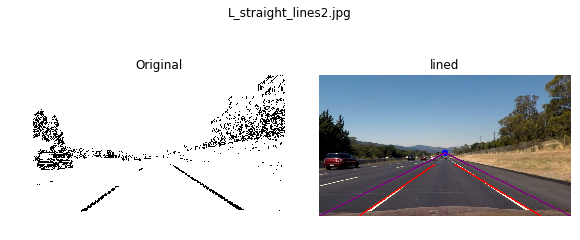

(720, 1280, 3)
./test_images/test3.jpg L_test3.jpg ./output_images/perspective/L_test3.jpg


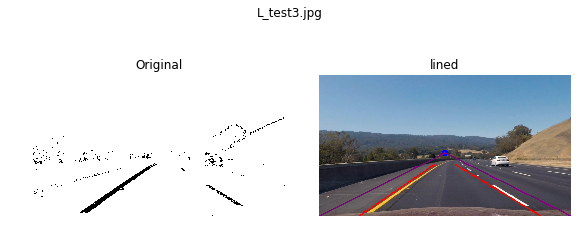

In [110]:
src_leftlowerpoint  = (203, 720)
src_leftupperpoint  = (585, 460)
src_rightlowerpoint = (1127, 720)
src_rightupperpoint = (695, 460)

#src_leftlowerpoint  = (203, 720)
#src_leftupperpoint  = (585, 460)
#src_rightlowerpoint = (1127, 720)
#src_rightupperpoint = (695, 460)

imgs = [ Perspectives(image_name , src_leftlowerpoint, src_leftupperpoint, src_rightlowerpoint, src_rightupperpoint) for image_name in image_names ]
#    leftlowerpoint  = [260,680]
#    leftupperpoint  = [568,470]
#    rightlowerpoint = [1043,680]
#    rightupperpoint = [717,470]

#    src = np.float32([leftupperpoint, leftlowerpoint, rightupperpoint, rightlowerpoint])
# 720, 1280
#    [200,680]
#    [200,0]
#    [1000,680]
#    [1000,0]

